**Grupa I4.2**

In [15]:
packages <- c("PairedData")
not_installed <- packages[!(packages %in% installed.packages()[ , "Package"])]
if(length(not_installed)) install.packages(not_installed)
invisible(lapply(packages, library, character.only = TRUE))

## Opis zbioru danych
Analizowany przeze mnie zbiór danych *2022 Fuel Consumption Ratings* zawiera dane o samochodach oraz wskaźniki zużycia paliwa i szacunkową emisję dwutlenku węgla dla nowych modeli przeznaczonych do sprzedaży detalicznej w Kanadzie w 2022 r.
Twórcą zbioru jest organizacja Natural Resources Canada (NRCan), a pochodzą one ze standardowych, kontrolowanych badań laboratoryjnych i procedur analitycznych przeprowadzanych przez producentów pojazdów. Zbiór zawiera 946 rekordów.

Dane pochodzą z platformy Kaggle i są dostępne pod adresem:
[https://www.kaggle.com/datasets/rinichristy/2022-fuel-consumption-ratings](https://www.kaggle.com/datasets/rinichristy/2022-fuel-consumption-ratings)

W swojej pracy dokonam analizy zużycia paliwa w mieście, na autostradzie i w cyklu mieszanym, a następnie sprawdzę czy występuje korelacja między pojemnością silnika a spalaniem paliwa.

In [16]:
Data <- read.csv(url("https://raw.githubusercontent.com/majsterkovic/siad/main/MY2022%20Fuel%20Consumption%20Ratings.csv"), sep = ",")

fuel_consumption_highway <- Data$Fuel.Consumption.Hwy..L.100.km..
fuel_consumption_city <- Data$Fuel.Consumption..City..L.100.km.
fuel_consumption_combined <- Data$Fuel.Consumption.Comb..L.100.km..

fuel_consumption <- data.frame(highway = fuel_consumption_highway, city = fuel_consumption_city, combined = fuel_consumption_combined)

engine_size <- Data$Engine.Size.L.

In [17]:
central_moment <- function(dane, nth) {
  mean((dane - mean(dane)) ^ nth)
}

var_population <- function(data) {
  central_moment(data, 2)
}

sd_population <- function (data) {
  sqrt(var_population(data))
}

kurtosis <- function(data) {
  central_moment(data, 4) / sd_population(data) ^ 4
}

skewness <- function(data) {
  central_moment(data, 3) / sd_population(data) ^ 3
}

showStatistics <- function(data, title, xtitle) {

print(c(Srednia = mean(data),
        Mediana = median(data),
        Wariancja = var_population(data),
        Odchylenie = sd_population(data),
        Minimum = min(data),
        Maksimum = max(data),
        Kurtoza = kurtosis(data),
        Skosnosc = skewness(data),
        Kwantyl = quantile(data, c(0.25, 0.75))

  ))

  k <- 1 + 3.322 * log(length(data))
  #k <- sqrt(length(data))
  #k <- (max(data) - min(data)) / (2.64 * n^(1/3) * IQR(data))
  #k <- 2 * IQR(data) / length(data)^(1/3)
  hist(data, breaks = k, main = title, ylab = "Częstość", xlab = xtitle)


  intervals <- cut(data, k)
  table(intervals)
}

## Analiza eksploracyjna

    Srednia     Mediana   Wariancja  Odchylenie     Minimum    Maksimum 
  3.1987315   3.0000000   1.8881168   1.3740876   1.2000000   8.0000000 
    Kurtoza    Skosnosc Kwantyl.25% Kwantyl.75% 
  3.0726967   0.9386136   2.0000000   3.8000000 


intervals
 (1.19,1.5]  (1.5,1.79] (1.79,2.09] (2.09,2.38] (2.38,2.68] (2.68,2.97] 
         18          55         219          26          93          40 
(2.97,3.27] (3.27,3.57] (3.57,3.86] (3.86,4.16] (4.16,4.45] (4.45,4.75] 
        137          64          59          40          25           1 
(4.75,5.04] (5.04,5.34] (5.34,5.63] (5.63,5.93] (5.93,6.23] (6.23,6.52] 
         32          60           2          15          37          12 
(6.52,6.82] (6.82,7.11] (7.11,7.41]  (7.41,7.7]  (7.7,8.01] 
          8           0           0           0           3 

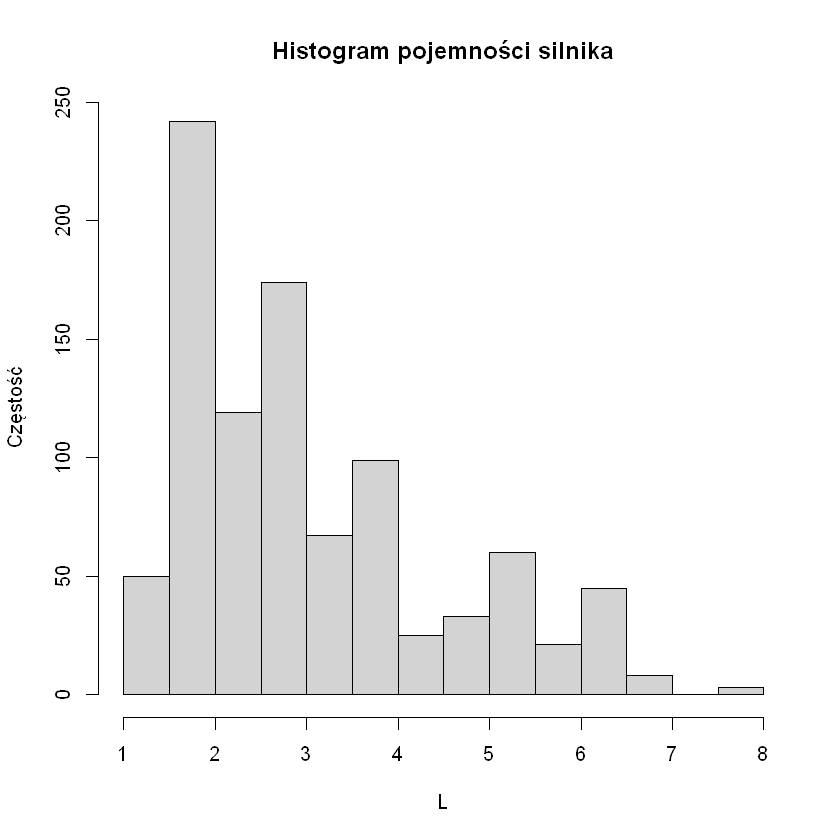

In [4]:
showStatistics(data = engine_size, title = "Histogram pojemności silnika", xtitle = "L")

Wśród samochodów przeważają modele z silnikami o pojemności poniżej 3.0L. Wykres jest skośny prawostronnie.

    Srednia     Mediana   Wariancja  Odchylenie     Minimum    Maksimum 
  9.3633192   9.2000000   5.2162761   2.2839168   3.9000000  20.9000000 
    Kurtoza    Skosnosc Kwantyl.25% Kwantyl.75% 
  4.6138110   0.8075969   7.7000000  10.7000000 


intervals
(3.88,4.64] (4.64,5.38] (5.38,6.12] (6.12,6.86]  (6.86,7.6]  (7.6,8.33] 
          5           8          24          75          96         142 
(8.33,9.07] (9.07,9.81] (9.81,10.6] (10.6,11.3]   (11.3,12]   (12,12.8] 
        108         148          88          62          67          55 
(12.8,13.5] (13.5,14.2]   (14.2,15]   (15,15.7] (15.7,16.5] (16.5,17.2] 
         32          18           6           2           4           2 
(17.2,17.9] (17.9,18.7] (18.7,19.4] (19.4,20.2] (20.2,20.9] 
          0           0           0           2           2 

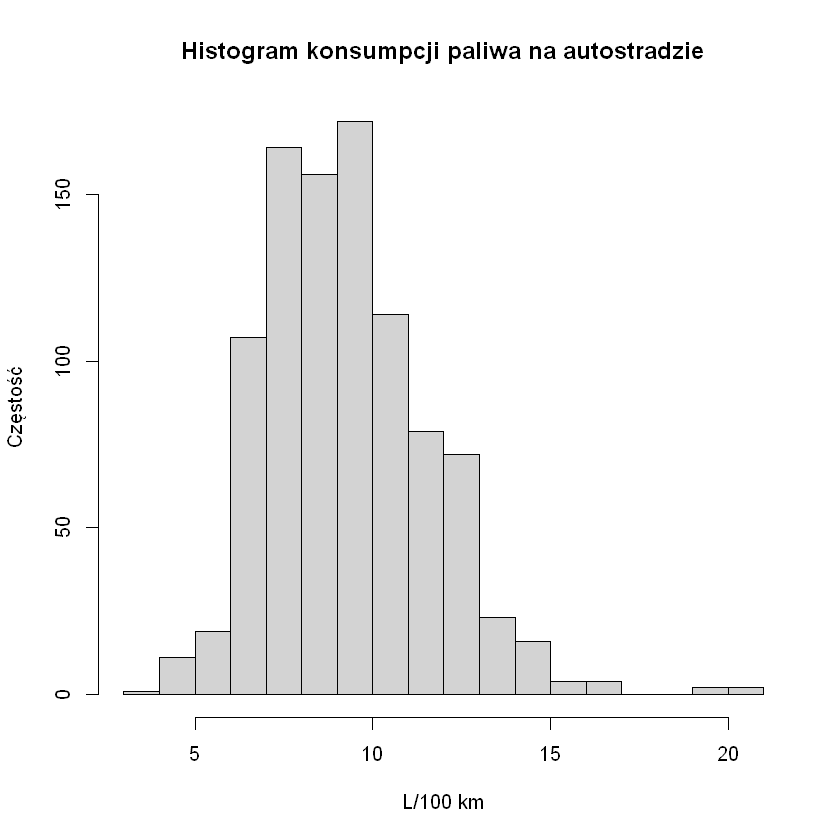

In [5]:
showStatistics(data = fuel_consumption$highway, title = "Histogram konsumpcji paliwa na autostradzie", xtitle = "L/100 km")

    Srednia     Mediana   Wariancja  Odchylenie     Minimum    Maksimum 
 12.5064482  12.2000000  11.9040070   3.4502184   4.0000000  30.3000000 
    Kurtoza    Skosnosc Kwantyl.25% Kwantyl.75% 
  5.0315720   0.7337936  10.2000000  14.7000000 


intervals
(3.97,5.14] (5.14,6.29] (6.29,7.43] (7.43,8.57] (8.57,9.72] (9.72,10.9] 
         11          11          12          65          87         132 
  (10.9,12]   (12,13.1] (13.1,14.3] (14.3,15.4] (15.4,16.6] (16.6,17.7] 
        132         146          83          80          80          48 
(17.7,18.9]   (18.9,20]   (20,21.2] (21.2,22.3] (22.3,23.4] (23.4,24.6] 
         27          12           6           5           3           0 
(24.6,25.7] (25.7,26.9]   (26.9,28]   (28,29.2] (29.2,30.3] 
          0           4           0           0           2 

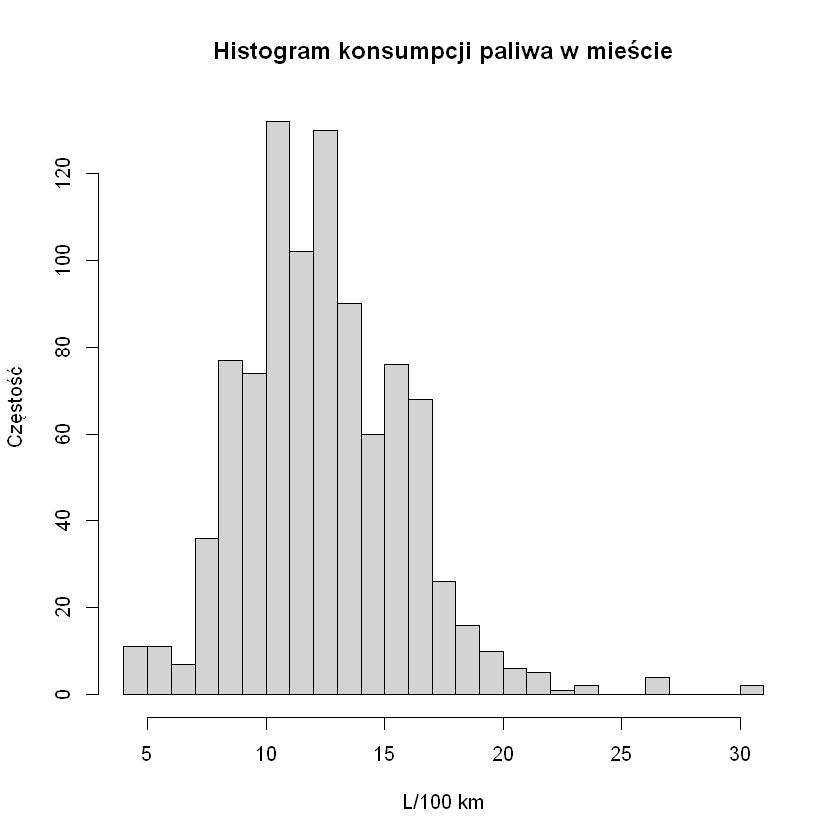

In [6]:
showStatistics(data = fuel_consumption$city, title = "Histogram konsumpcji paliwa w mieście", xtitle = "L/100 km")

    Srednia     Mediana   Wariancja  Odchylenie     Minimum    Maksimum 
 11.0920719  10.8000000   8.2642183   2.8747554   4.0000000  26.1000000 
    Kurtoza    Skosnosc Kwantyl.25% Kwantyl.75% 
  4.7649780   0.7205684   9.1000000  12.9000000 


intervals
(3.98,4.96] (4.96,5.92] (5.92,6.88] (6.88,7.84]  (7.84,8.8]  (8.8,9.77] 
          9           8          20          74          90         129 
(9.77,10.7] (10.7,11.7] (11.7,12.6] (12.6,13.6] (13.6,14.6] (14.6,15.5] 
        133         113         113          66          81          59 
(15.5,16.5] (16.5,17.5] (17.5,18.4] (18.4,19.4] (19.4,20.3] (20.3,21.3] 
         24          11           3           2           3           1 
(21.3,22.3] (22.3,23.2] (23.2,24.2] (24.2,25.1] (25.1,26.1] 
          5           0           0           0           2 

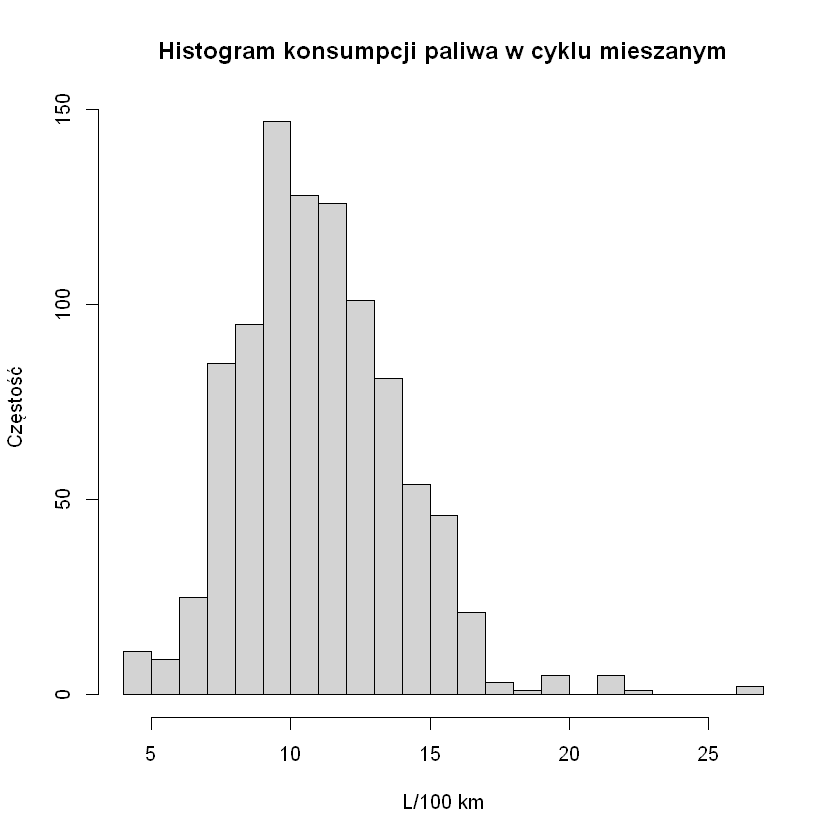

In [7]:
showStatistics(data = fuel_consumption$combined, title = "Histogram konsumpcji paliwa w cyklu mieszanym", xtitle = "L/100 km")

Analizując powstałe statystyki można zauważyć, że największa wariancja występuje dla zużycia paliwa w mieście, a najmniejsza, na autostradzie. Można by więc zakładać, że spalanie podczas jazdy po mieście jest bardziej zróżnicowane przez niestałą pracę silnika. Na wszystkich trzech histogramach dominują wartości w granicach 8-12 l/100 km. Wykresy przypominają rozkład normalny, ale są prawoskośne.

## Testowanie hipotez

Na podstawie dostępnych danych postanowiłem zbadać czy spalanie paliwa na autostradzie i w mieście jest zróżnicowane. Powszechnie mówi się, że zużycie paliwa w mieście jest większe. Sformułowane przez mnie hipotezy brzmią następująco:

Hipoteza zerowa: $\mu_m = \mu_a \Rightarrow  \mu_m - \mu_a = 0$

Hipoteza alternatywna: $\mu_m > \mu_a \Rightarrow  \mu_m - \mu_a > 0$

Moje populacje są sparowane, ponieważ dane w parach dotyczą tego samego modelu samochodu. Jeśli interesuje mnie czy średnie pomiędzy populacjami są równe to tak naprawdę interesuje mnie czy ich różnica jest równa 0. Mog więc odjąć jeden wynik w parze od drugiego i traktować je jako nową populację, populację różnic wyników.

Nowa populacja ma rozkład w przybliżeniu normalny, liczebność próby jest wystarczająca, wariancja jest znana, więc mogę wykonać prawostronny test Z.

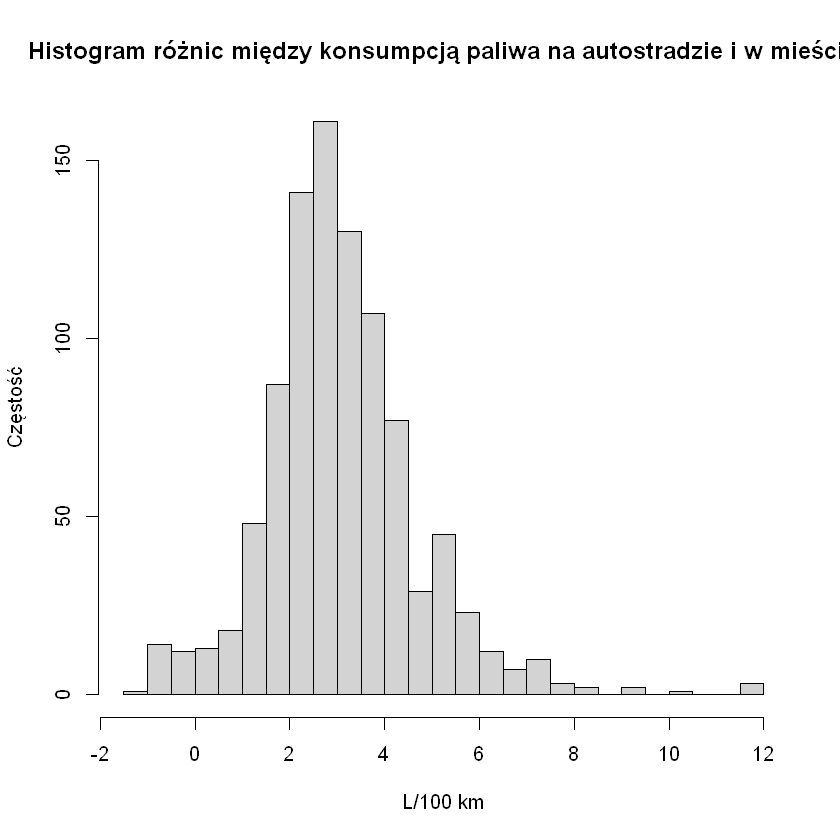

In [18]:
fuel_consumption_diff <- fuel_consumption$city - fuel_consumption$highway
hist(fuel_consumption_diff, breaks="FD", main="Histogram różnic między konsumpcją paliwa na autostradzie i w mieście", ylab="Częstość", xlab="L/100 km")

Dla testu wybieram próbę o liczebności 100. Pary danych zostały zwizualizowane na poniższym wykresie.

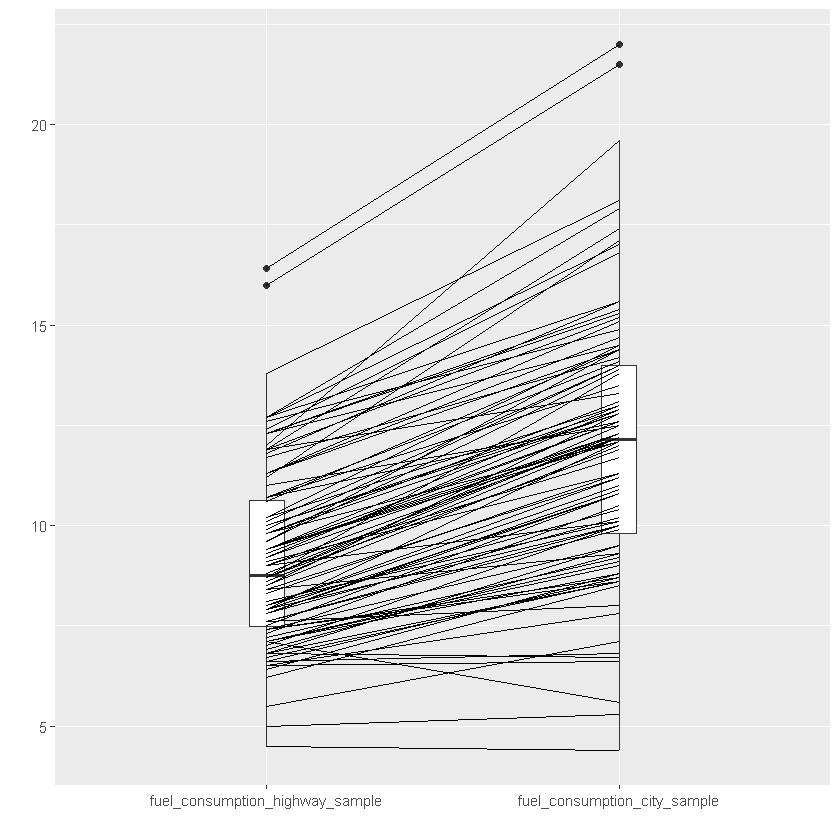

In [23]:
index <- sample(1:nrow(fuel_consumption), 100, replace=F)
fuel_consumption_city_sample <- fuel_consumption$city[index]
fuel_consumption_highway_sample <- fuel_consumption$highway[index]

pd <- paired(fuel_consumption_highway_sample, fuel_consumption_city_sample)
plot(pd, type = "profile")

In [24]:
z_test <-function(alpha, population, sample) {

  mean_population <- mean(population)
  var_population <- var_population(population)
  mean_sample <- mean(sample)

  z_crit <- qnorm(1-alpha)

  Z <- (mean_sample - 0) / sqrt( var_population / length(population) )
  p <- 1 - pnorm(Z)

  if (Z < z_crit) {
    sprintf("Wartosc testu Z: %f. Zbior krytyczny: <%f; inf). Nie ma dowodow na odrzucenie hipotezy zerowej. P-value: %f", Z, z_crit, p)
  } else {
    sprintf("Wartość testu Z: %f. Zbior krytyczny: <%f; inf). Należy odrzucić hipotezę zerową. P-value: %f", Z, z_crit, p)
  }
}
fuel_consumption_diff_sample <-  fuel_consumption_city_sample - fuel_consumption_highway_sample
alpha <- 0.02

z_test(alpha, fuel_consumption_diff, fuel_consumption_diff_sample)

[1] "Wartość testu Z: 54.269151. Zbior krytyczny: <2.053749; inf). Należy odrzucić hipotezę zerową. P-value: 0.000000"

Wartość testu Z znalazła się w zbiorze krytycznym, więc należało odrzucić hipotezę zerową. P-value jest mniejsze niż 0.01, więc istnieje bardzo silna przesłanka przeciwko hipotezie zerowej. Poziom istotności statystycznej został obrany bardzo niewielki, więc prawdopodobieństwo odrzucenia "prawdziwej hipotezy zerowej" i popełnienia błędu pierwszego rodzaju było bardzo małe. Hipoteza była rzeczywiście prawdziwa, ponieważ spalanie w mieście jest średnio większe niż spalanie na autostradzie, więc nie został popełniony błąd pierwszego rodzaju.

Kolejną rzeczą, którą sprawdzę jest istnienie korelacji między pojemnością silnika a spalaniem w cyklu mieszanym.

In [11]:
n <- length(engine_size)
dane <- data.frame(engine_size, fuel_consumption$combined)

ef <- mean(fuel_consumption$combined)
es <- mean(engine_size)
sdf <- sd_population(fuel_consumption$combined)
sds <- sd_population(engine_size)

r  <- mean((fuel_consumption$combined - ef) * (engine_size - es)) / (sdf * sds)

sprintf("Wspolczynnik korelacji: %f", r)

[1] "Wspolczynnik korelacji: 0.818694"

Mogę przetestować stastystycznie istotność współczynnika korelacji.

$H_0$: $r = 0$

$H_1$: $r \neq 0$

In [12]:
alpha <- 0.05
T <- r / sqrt(1 - r^2) * sqrt(n - 2)
p_value <- 2 * pt(T, lower.tail = F, df = n-2)
if(p_value < alpha) {
  sprintf("Wartość testu T: %f. Należy odrzucić hipotezę zerową.", T)
} else {
  sprintf("Wartość testu T: %f. Nie należy odrzucić hipotezę zerową.", T)
}

[1] "Wartość testu T: 43.804724. Należy odrzucić hipotezę zerową."

Współczynnik korelacji jest większy od zera, korelacja jest dodatnia, gdy rośnie pojemność silnika zwiększa się spalanie. Wartość na poziomie 0.82 wskazuje na dość silną zależność.


Call:
lm(formula = fuel_consumption$combined ~ engine_size, data = dane)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9953 -1.0709 -0.0517  0.9579  6.8089 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.6133     0.1361   41.24   <2e-16 ***
engine_size   1.7128     0.0391   43.80   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.653 on 944 degrees of freedom
Multiple R-squared:  0.6703,	Adjusted R-squared:  0.6699 
F-statistic:  1919 on 1 and 944 DF,  p-value: < 2.2e-16


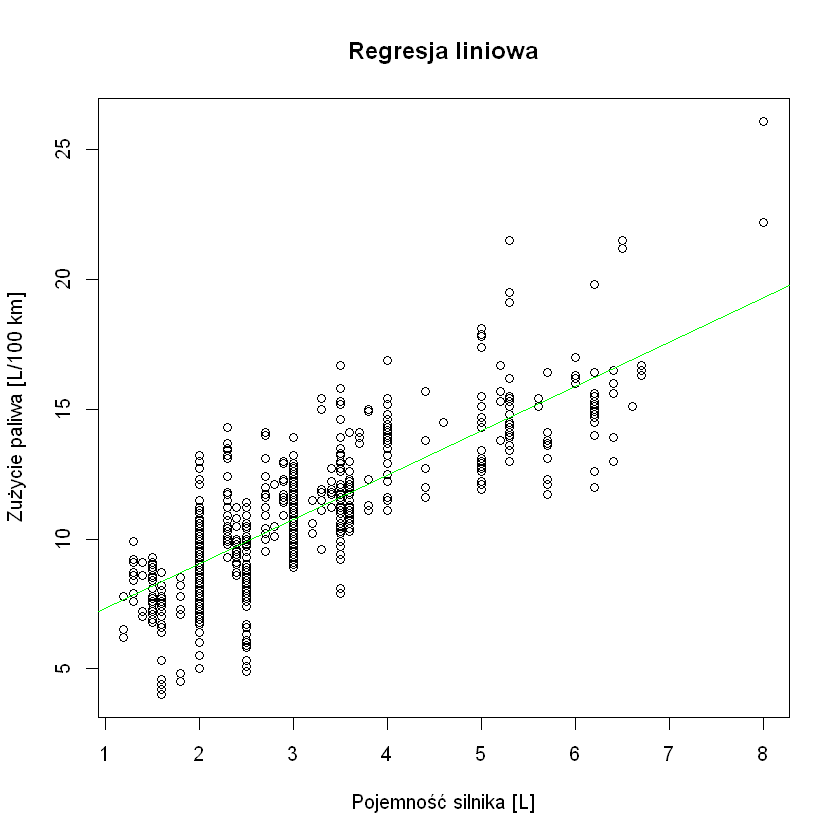

In [13]:
plot(fuel_consumption$combined ~ engine_size, xlab="Pojemność silnika [L]", ylab="Zużycie paliwa [L/100 km]", main="Regresja liniowa")
model <- lm(fuel_consumption$combined ~ engine_size, dane)
summary(model)
abline(model, col="green")

## Podsumowanie
* Motywacją wyboru zbioru danych i testów była chęć zbadania, czy faktycznie istnieją powszechnie znane zależności i uda się je wykazać wykonując analizę statystyczną.
* Wynikiem pierwszego testu jest bardzo duża wartośc statystyki testowej i bardzo małe p-value. Wnioskuję, że sprawdzana zależność była "zbyt oczywista" i nie było szans na jej obalenie.
* Współczynnik korelacji pomiędzy pojemnością silnika a zużyciem paliwa okazał się wysoki i istotny statystycznie.
* Dalszym krokiem mogłoby być zbadanie zależności pomiędzy innymi danymi w zbiorze, np. typem paliwa, marką samochodu, itp. Można by też próbować porównać dane ze zbiorem z innego roku.
